# Chapter 13: The Law of Large Numbers (LLN)

# Introduction

In the previous chapters, we explored individual random variables and their distributions, as well as how multiple variables interact. Now, we venture into the fascinating realm of *limit theorems*. These theorems describe the long-term behavior of sequences of random variables, forming the theoretical bedrock for many statistical methods and simulations.

The first major limit theorem we'll explore is the **Law of Large Numbers (LLN)**. Intuitively, the LLN tells us that if we repeat an experiment independently many times, the average of the outcomes will tend to get closer and closer to the theoretical expected value of the experiment. This aligns with our everyday understanding – flip a fair coin enough times, and the proportion of heads will likely be very close to 50%. The LLN provides the mathematical justification for this intuition and is fundamental to why simulation methods, like Monte Carlo, work.

In this chapter, we will:
1.  Introduce **Chebyshev's Inequality**, a tool that provides a bound on how likely a random variable is to deviate far from its mean.
2.  Define and explain the **Weak Law of Large Numbers (WLLN)**, focusing on convergence in probability.
3.  Discuss the conceptual difference with the **Strong Law of Large Numbers (SLLN)**.
4.  Illustrate the practical implications, particularly how the LLN justifies **Monte Carlo simulations**.
5.  Use Python simulations to visualize the convergence described by the LLN.

Let's begin by looking at an inequality that helps us quantify deviations from the mean.

# Chebyshev's Inequality

Chebyshev's Inequality provides a way to estimate the probability that a random variable takes a value far from its mean, using only its mean ($\mu$) and variance ($\sigma^2$). It's powerful because it applies regardless of the specific distribution of the random variable, as long as the mean and variance are finite.

**Theorem (Chebyshev's Inequality):** Let $X$ be a random variable with finite mean $\mu = E[X]$ and finite variance $\sigma^2 = Var(X)$. Then, for any real number $\epsilon > 0$:

$$P(|X - \mu| \ge \epsilon) \le \frac{Var(X)}{\epsilon^2} = \frac{\sigma^2}{\epsilon^2}$$

Alternatively, letting $\epsilon = k\sigma$ for some $k > 0$, the inequality can be written as:

$$P(|X - \mu| \ge k\sigma) \le \frac{1}{k^2}$$

This second form states that the probability of $X$ being $k$ or more standard deviations away from its mean is at most $1/k^2$.

* For $k=2$, the probability of being 2 or more standard deviations away is at most $1/4 = 0.25$.
* For $k=3$, the probability of being 3 or more standard deviations away is at most $1/9 \approx 0.11$.

**Interpretation:** Chebyshev's inequality gives us a *guaranteed upper bound* on the probability of large deviations. This bound is often quite loose (i.e., the actual probability might be much smaller), especially if we know more about the distribution (like if it's Normal). However, its universality makes it very useful in theoretical contexts.

**Example:** Suppose the average daily return of a stock ($\mu$) is 0.05% and the standard deviation ($\sigma$) is 1%. What is the maximum probability that the return on a given day is outside the range [-1.95%, 2.05%]?
This range corresponds to being $k\sigma$ away from the mean, where $k\sigma = 2\%$, so $k = 2\% / 1\% = 2$.
Using Chebyshev's inequality with $k=2$:
$P(|X - 0.05\%| \ge 2 \times 1\%) \le \frac{1}{2^2} = \frac{1}{4} = 0.25$.
So, there's at most a 25% chance that the daily return falls outside the [-1.95%, 2.05%] range, regardless of the specific distribution shape (as long as mean and variance are as stated).

## Hands-on: Illustrating Chebyshev's Bound

Let's consider a Binomial random variable, say $X \sim Binomial(n=100, p=0.5)$.
We know $E[X] = np = 100 \times 0.5 = 50$.
And $Var(X) = np(1-p) = 100 \times 0.5 \times 0.5 = 25$, so $\sigma = \sqrt{25} = 5$.

Let's check the probability of being $k=2$ standard deviations away from the mean. That is, $P(|X - 50| \ge 2 \times 5) = P(|X - 50| \ge 10)$. This means we want $P(X \le 40 \text{ or } X \ge 60)$.

Chebyshev's inequality states: $P(|X - 50| \ge 10) \le \frac{1}{2^2} = 0.25$.

Let's calculate the actual probability using `scipy.stats`.

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters
n = 100
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
k = 2
epsilon = k * sigma

In [3]:
# Calculate the actual probability P(|X - mu| >= k*sigma)
# This is P(X <= mu - k*sigma) + P(X >= mu + k*sigma)
# Since Binomial is discrete, we need P(X <= floor(mu - k*sigma)) + P(X >= ceil(mu + k*sigma))
lower_bound = np.floor(mu - epsilon)
upper_bound = np.ceil(mu + epsilon)

In [4]:
prob_lower = binom.cdf(k=lower_bound, n=n, p=p)
prob_upper = 1.0 - binom.cdf(k=upper_bound - 1, n=n, p=p) # P(X >= upper_bound) = 1 - P(X < upper_bound) = 1 - P(X <= upper_bound - 1)

In [5]:
actual_prob = prob_lower + prob_upper

In [6]:
# Chebyshev bound
chebyshev_bound = 1 / (k**2)

In [7]:
print(f"Distribution: Binomial(n={n}, p={p})")
print(f"Mean (mu): {mu}, Standard Deviation (sigma): {sigma:.2f}")
print(f"Checking deviation of k={k} standard deviations (epsilon={epsilon:.2f})")
print(f"We want P(|X - {mu}| >= {epsilon:.2f}), which is P(X <= {lower_bound} or X >= {upper_bound})")
print(f"Actual Probability: {actual_prob:.4f}")
print(f"Chebyshev Bound: <= {chebyshev_bound:.4f}")
print(f"Is the actual probability less than or equal to the bound? {actual_prob <= chebyshev_bound}")

Distribution: Binomial(n=100, p=0.5)
Mean (mu): 50.0, Standard Deviation (sigma): 5.00
Checking deviation of k=2 standard deviations (epsilon=10.00)
We want P(|X - 50.0| >= 10.00), which is P(X <= 40.0 or X >= 60.0)
Actual Probability: 0.0569
Chebyshev Bound: <= 0.2500
Is the actual probability less than or equal to the bound? True


In [8]:
# Plot the distribution and the bounds
x_values = np.arange(0, n + 1)
pmf_values = binom.pmf(k=x_values, n=n, p=p)

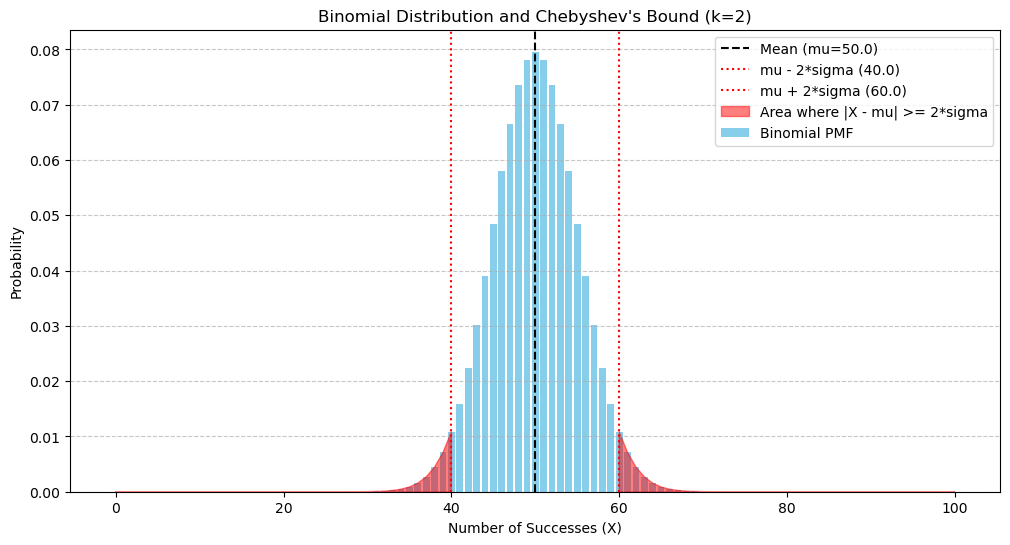

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(x_values, pmf_values, label='Binomial PMF', color='skyblue')
plt.axvline(mu, color='black', linestyle='--', label=f'Mean (mu={mu})')
plt.axvline(mu - epsilon, color='red', linestyle=':', label=f'mu - {k}*sigma ({mu - epsilon:.1f})')
plt.axvline(mu + epsilon, color='red', linestyle=':', label=f'mu + {k}*sigma ({mu + epsilon:.1f})')
plt.fill_between(x_values, pmf_values, where=(x_values <= lower_bound) | (x_values >= upper_bound),
                 color='red', alpha=0.5, label=f'Area where |X - mu| >= {k}*sigma')
plt.title("Binomial Distribution and Chebyshev's Bound (k=2)")
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()